In [2]:
import numpy as np
import pandas as pd



In [23]:
df = pd.read_csv(r'D:/AI_ML/Python/Data_files/temp/linux2.csv')
df.head()

,DT,Message,Severity
0,2020-06-14 15:16:01,sshd(pam_unix)[19939]: authentication failure;...,1
1,2020-06-14 15:16:02,sshd(pam_unix)[19937]: check pass; user unknown,0
2,2020-06-14 15:16:02,sshd(pam_unix)[19937]: authentication failure;...,1
3,2020-06-15 02:04:59,sshd(pam_unix)[20882]: authentication failure;...,1
4,2020-06-15 02:04:59,sshd(pam_unix)[20884]: authentication failure;...,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DT        2000 non-null   object
 1   Message   2000 non-null   object
 2   Severity  2000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [25]:
# convert the 'Date' column to datetime format
df['DT'] = df['DT'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DT        2000 non-null   datetime64[ns]
 1   Message   2000 non-null   object        
 2   Severity  2000 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 47.0+ KB


In [43]:
df.shape

(2000, 3)

In [46]:
df.isnull().sum()

DT          0
Message     0
Severity    0
dtype: int64

In [27]:
import matplotlib.pyplot as plt

In [74]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(18, 4)})

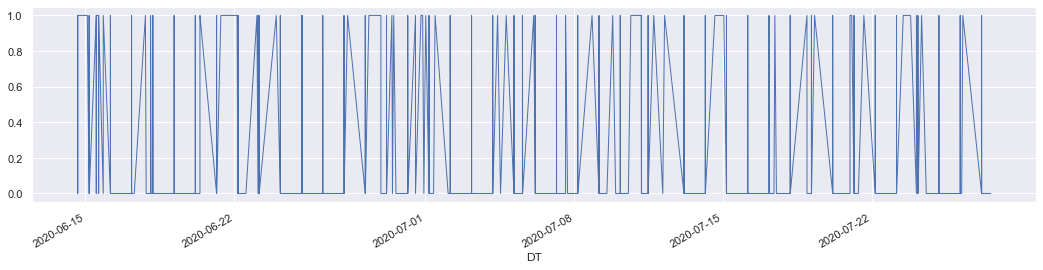

In [84]:
df_dt = df.set_index('DT')
df_dt['Severity'].plot(linewidth=1);

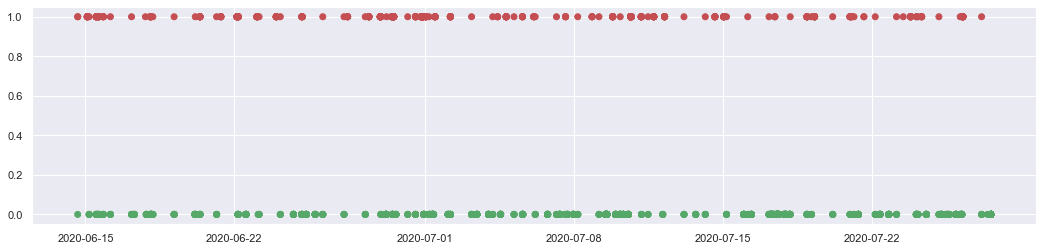

In [82]:
marker_colors = df_dt['Severity'].replace([0, 1],['g', 'r'])
plt.scatter(df_dt.index, df_dt['Severity'], c=marker_colors)
plt.show()

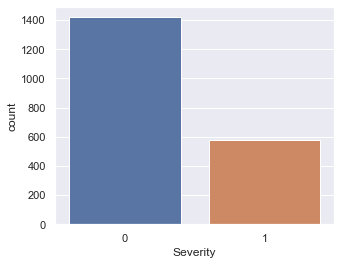

In [85]:
sns.set(rc={'figure.figsize':(5, 4)})
sns.countplot(data=df, x='Severity');

In [88]:
import re

def clean_content(message):

    # Converting news content to lowercase
    message = message.lower()
    # Removing characters apart from alphabets
    message = re.sub('([^A-Za-z ])+', ' ', message)
    # Removing words less than 3 characters
    message = re.sub(r'(\b.{1,2}\s)+', ' ', message)
    
    return message

In [89]:
df['Message'] = df['Message'].apply(clean_content)
df.sample(10)

,DT,Message,Severity
772,2020-07-04 12:52:44,ftpd connection from adsl dsl mtry pacbell ne...,0
1713,2020-07-23 11:46:41,sshd pam unix authentication failure logname u...,1
763,2020-07-04 04:03:06,pam unix session opened for user cyrus uid,0
1215,2020-07-10 16:33:01,sshd pam unix authentication failure logname u...,1
897,2020-07-07 08:06:15,login pam unix session opened for user root l...,0
516,2020-06-30 12:48:41,sshd pam unix authentication failure logname u...,1
513,2020-06-30 12:48:41,sshd pam unix check pass user unknown,0
1638,2020-07-21 09:04:41,ftpd connection from thu,0
1745,2020-07-24 02:38:22,ftpd connection from sun,0
670,2020-07-02 01:41:32,sshd pam unix session opened for user test uid,0


In [90]:
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [91]:
from typing import List
def get_vectors(texts) -> List:
    text = [t for t in texts]
    my_tfidf_vectorizer = TfidfVectorizer()
    my_tfidf_vectorizer.fit(text)

    return my_tfidf_vectorizer.transform(text).toarray()

def get_cosign_sim(received_vectors):
    return cosine_similarity(received_vectors)

In [92]:
vectors = get_vectors(df['Message'])
vectors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [93]:
vectors.shape

(2000, 388)

In [94]:
print(vectors[0][100:300])

[0.         0.         0.         0.         0.         0.
 0.30595272 0.         0.         0.         0.30569389 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.30595272 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [95]:
type(vectors)

numpy.ndarray

In [96]:
# Checking the similarities amoung vectors
similarity = get_cosign_sim(vectors)
similarity

array([[1.        , 0.18534168, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.18534168, 1.        , 0.18534168, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.18534168, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.06691129,
        0.06024333],
       [0.        , 0.        , 0.        , ..., 0.06691129, 1.        ,
        0.06373372],
       [0.        , 0.        , 0.        , ..., 0.06024333, 0.06373372,
        1.        ]])

In [97]:
# use PCA to reduce dimensionality from 6 to 2
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = (12, 6)

pca = PCA(n_components=2)
cos_sim_pca = pca.fit_transform(similarity)
retained_variance = pca.explained_variance_ratio_
print(retained_variance)
cos_sim_pca

[0.60536501 0.16034423]


array([[13.58332779, -4.99822882],
       [ 4.19932657,  5.59893615],
       [13.58332779, -4.99822882],
       ...,
       [-1.29421298,  5.3177176 ],
       [-1.29424371,  5.31624016],
       [-1.2943233 ,  5.31510446]])

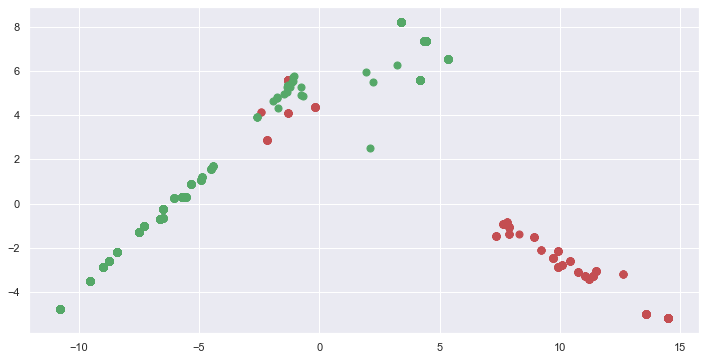

In [99]:
# Plot the texts as per similarity
n = cos_sim_pca.shape[0]
fig, ax = plt.subplots()
labels = ["" for i in range(n)]
marker_colors = df_dt['Severity'].replace([0, 1],['g', 'r'])

for i in range(n):
    x = cos_sim_pca[i, 0]
    y = cos_sim_pca[i, 1]
    ax.scatter(x, y, s=50, c=marker_colors[i])

plt.show()